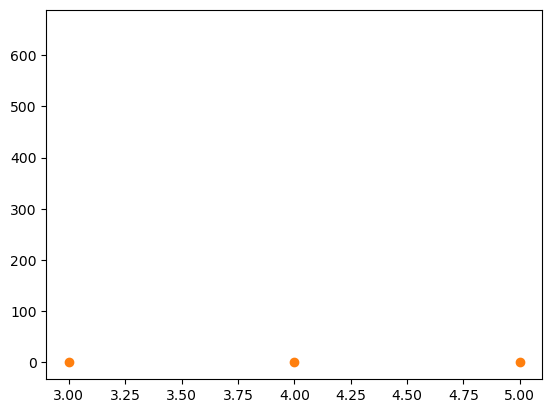

In [3]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting

######################
# Experimental Points
######################

x_656, y_656 = 3, 655.9217890603793 # wavelength for n=3 -> n=2
#point_n_4 = (4, 655.9217890603793)
#point_n_5 = (5, 655.9217890603793)
#point_n_6 = (6, 655.9217890603793)


#####################
# Theoretical Values
#####################

n = np.arange(3, 6) # n=3 
R = 1.09678E7 # Rydberg constant
function = 1 / (R * ((1/2**2) - (1/n**2)))


################
# Plot Values
# and Function
################

# plt.figure(figsize=(15,10))
plt.plot(x_656, y_656)
plt.plot(n, function, 'o', label="data")
plt.show()